In [1]:
import pandas as pd
# 저희는 Tabular Data를 다루기 때문에 아래 라이브러리를 호출합니다.
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sktime.utils.plotting import plot_series


c:\ProgramData\anaconda3\envs\autog\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_df = pd.read_csv('./data/final_train_preprocessed_split2_lbw.csv')
#test_df = pd.read_csv('./data/test_preprocessed_split2_lbw.csv')

train_df = train_df.drop(columns = 'Unnamed: 0')
#test_df = test_df.drop(columns = 'Unnamed: 0')

In [3]:
miss = pd.read_csv('./miss_data_split2_lbw.csv')

In [29]:
bnum=54
train54 = train_df.loc[train_df.building_number == bnum]
test54 = pd.DataFrame()
pretrain54 = pd.DataFrame()
test54 = pd.concat([test54, train54[-168:]])
pretrain54 = pd.concat([pretrain54, train54[:-168]])


In [30]:
train = TabularDataset(pretrain54)
test = TabularDataset(test54)

In [ ]:
predictor = TabularPredictor(label='power_consumption', eval_metric='mean_squared_error',).fit(train)

In [8]:
ld_board = predictor.leaderboard(train, silent=True)

ld_board

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,-4942.850466,-23577.144765,0.037899,0.003990,0.845605,0.037899,0.003990,0.845605,1,True,9
1,CatBoost,-5049.934558,-19477.579305,0.013963,0.002994,5.477912,0.013963,0.002994,5.477912,1,True,6
2,LightGBMLarge,-5413.732091,-26908.421783,0.050864,0.003989,1.693616,0.050864,0.003989,1.693616,1,True,11
3,WeightedEnsemble_L2,-5686.053698,-18801.699789,0.087272,0.014962,20.911656,0.009974,0.000000,0.296771,2,True,12
4,LightGBM,-6076.416179,-24852.111886,0.064924,0.003989,0.949968,0.064924,0.003989,0.949968,1,True,4
5,LightGBMXT,-6823.559696,-25295.364771,0.069813,0.012966,2.210599,0.069813,0.012966,2.210599,1,True,3
6,ExtraTreesMSE,-7945.079637,-25937.760888,0.105778,0.045883,0.501647,0.105778,0.045883,0.501647,1,True,7
7,RandomForestMSE,-8602.272366,-28548.717159,0.099970,0.045952,1.042950,0.099970,0.045952,1.042950,1,True,5
8,NeuralNetTorch,-16934.899106,-26723.732669,0.025437,0.007979,14.291368,0.025437,0.007979,14.291368,1,True,10
9,KNeighborsDist,-19385.633418,-96773.082019,0.012476,0.001995,0.005983,0.012476,0.001995,0.005983,1,True,2


In [9]:
# 가장 우수한 모델의 이름을 가져옵니다.
best_model_name = predictor.get_model_best()

# 가장 우수한 모델로 예측 수행
predictions = predictor.predict(test, model=best_model_name)

# 예측 결과 출력
print(predictions)

109992     814.152283
109993     772.537170
109994     755.401367
109995     686.829956
109996     713.964111
             ...     
110155    1730.832764
110156    1548.286133
110157     960.367310
110158     954.121582
110159    1058.307617
Name: power_consumption, Length: 168, dtype: float32


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='power_consumption'>)

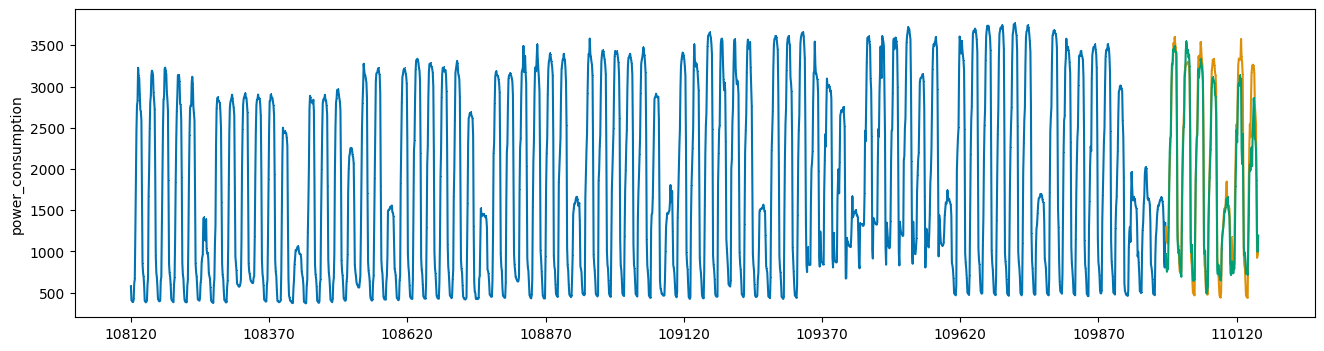

In [31]:

pretrain54_y = pretrain54['power_consumption']
test54_y = test54['power_consumption']

predictions.index = np.arange(test54.index[0], test54.index[-1]+1)
plot_series(pretrain54_y, test54_y, pd.Series(predictions), markers=[',' , ',', ','])

In [3]:

def weighted_mse(alpha = 1):
    def weighted_mse_fixed(label, pred):
        residual = (label - pred).astype("float")
        grad = np.where(residual>0, -2*alpha*residual, -2*residual)
        hess = np.where(residual>0, 2*alpha, 2.0)
        return grad, hess
    return weighted_mse_fixed

 #점수 측정을 위한 코드
def SMAPE(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


In [13]:
y_test_np = test54['power_consumption']
score = SMAPE(y_test_np, predictions)
print(score)

28.173347845074556


제출용

In [ ]:
train_df = pd.read_csv('./data/final_train_preprocessed_split2_lbw.csv')
test_df = pd.read_csv('./data/test_preprocessed_split2_lbw.csv')

train_df = train_df.drop(columns = 'Unnamed: 0')
test_df = test_df.drop(columns = 'Unnamed: 0')

bnum=3
train54 = train_df.loc[train_df.building_number == bnum]
test54 = test_df.loc[test_df.building_number == bnum]

train = TabularDataset(train54)
test = TabularDataset(test54)

predictor = TabularPredictor(label='power_consumption', eval_metric='mean_squared_error',).fit(train)

ld_board = predictor.leaderboard(train, silent=True)

ld_board

In [10]:
miss_10 = miss.loc[miss.SMAPE > 15]
for num in miss_10['building_number']:
    print(num)

3
14
18
19
30
42
53
54
80
82
83
88
89
90
91
92
95
98


In [ ]:
train_df = pd.read_csv('./data/final_train_preprocessed_split2_lbw.csv')
test_df = pd.read_csv('./data/test_preprocessed_split2_lbw.csv')

train_df = train_df.drop(columns = 'Unnamed: 0')
test_df = test_df.drop(columns = 'Unnamed: 0')

#bnum=3
for num in miss_10['building_number']:
    train54 = train_df.loc[train_df.building_number == num]
    test54 = test_df.loc[test_df.building_number == num]

    train = TabularDataset(train54)
    test = TabularDataset(test54)

    predictor = TabularPredictor(label='power_consumption', eval_metric='mean_squared_error',).fit(train)

    # 가장 우수한 모델의 이름을 가져옵니다.
    best_model_name = predictor.get_model_best()

    # 가장 우수한 모델로 예측 수행
    predictions = predictor.predict(test, model=best_model_name)

    subm = pd.read_csv('./submission\submission_autog_more15_lbw.csv')

    for idx, value in predictions.items():
        subm.loc[idx, 'answer'] = value

    subm.to_csv('./submission/submission_autog_more15_lbw.csv', index = False)

In [7]:
compare1 = pd.read_csv('./submission\submission_autog_more15_lbw.csv')
compare2 = pd.read_csv('./submission\submission_autog54_lbw.csv')
compare = compare1['answer'] - compare2['answer']

In [19]:
# 가장 우수한 모델의 이름을 가져옵니다.
best_model_name = predictor.get_model_best()

# 가장 우수한 모델로 예측 수행
predictions = predictor.predict(test, model=best_model_name)

# 예측 결과 출력
print(predictions)


In [20]:
subm = pd.read_csv('./submission\submission_autog_more15_lbw.csv')

for idx, value in predictions.items():
    subm.loc[idx, 'answer'] = value

subm.to_csv('./submission/submission_autog_more15_lbw.csv', index = False)


In [4]:
autog54= pd.read_csv('./submission\submission_autog54_lbw.csv')
autog542 = pd.read_csv('./submission\submission_autog54_lbw.csv')
new_pred =  pd.read_csv('./submission\submission_xgb_wsw_mean_all_cat.csv')



for i in [35,39,40,41,53,54,56,58,64,75,76,87,89,91,92]:
    k = i - 1
    index = k*168
    autog54[index:index+168] = new_pred[index:index+168]


autog54.to_csv('./submission/submission_autog_mean_all.csv', index = False)

